In [1]:
!nvidia-smi

Thu Feb  9 13:06:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 520.61.05    Driver Version: 520.61.05    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
|  0%   50C    P5    40W / 270W |    840MiB /  8192MiB |     44%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
import torch

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

(473, 824, 4)


(473, 824, 4)

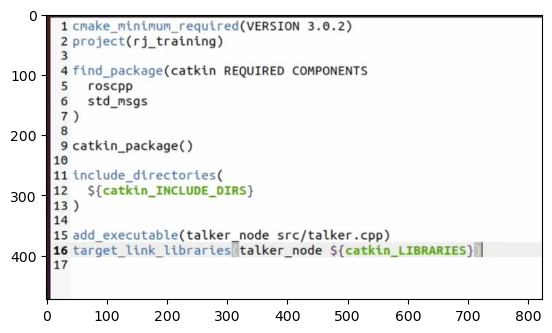

In [9]:
img = mpimg.imread("test.png")
print(img.shape)
plot = plt.imshow(img)
np.shape(img)

In [10]:
img_tensor_color = torch.tensor(img)
img_tensor_color = torch.flatten(img_tensor_color)
print(img_tensor_color)
img_tensor_color.size()

tensor([0.2549, 0.1216, 0.1294,  ..., 0.9961, 0.9961, 1.0000])


torch.Size([1559008])

(473, 824)
<class 'numpy.ndarray'>


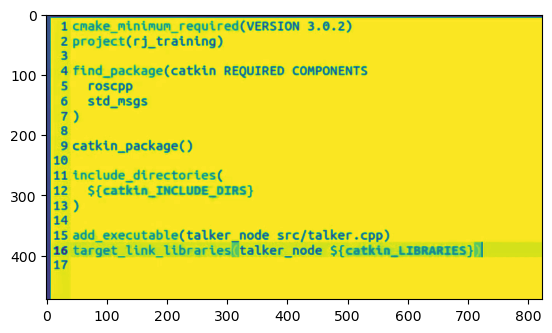

In [7]:
img_gray = img[:,:,0]
print(np.shape(img_gray))
plot = plt.imshow(img_gray)
print(type(img_gray))
# img_tensor_gray = torch.tensor(img_gray)
# img_tensor_gray = torch.flatten(img_tensor_gray)
# img_tensor_gray.size()

In [17]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(473*824, 500),
            nn.ReLU(),
            nn.Linear(500, 400),
            nn.ReLU(),
            nn.Linear(400, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )
    def forward(self, x):
        logits = self.seq(x)
        return logits

In [18]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (seq): Sequential(
    (0): Linear(in_features=389752, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=400, bias=True)
    (3): ReLU()
    (4): Linear(in_features=400, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [19]:
logits = model(img_tensor_gray)

In [20]:
print(logits)

tensor([-0.0324,  0.0326,  0.1291,  0.0010,  0.0540,  0.0720, -0.0389, -0.0946,
         0.0042, -0.1318], grad_fn=<AddBackward0>)


In [22]:
logits.p

tensor([-0.0324,  0.0326,  0.1291,  0.0010,  0.0540,  0.0720, -0.0389, -0.0946,
         0.0042, -0.1318], grad_fn=<AddBackward0>)